In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

# Congressional District Ideology

Data from <a href="https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/BQKU4M">here</a>

In [6]:
cdid = pd.read_csv("aip_cd_ideology_v2022a.tab", sep="\t")
cdid

,cd_fips,state,mrp_ideology_se,mrp_ideology,irt_ideology_unweighted,self_ideology,self_ideology_se,irt_ideology_unweighted_sd,irt_ideology_unweighted_se,sample_size,demshare_pres,presidential_year,congress,survey_period
0,1000.0,Delaware,0.069618,-0.045890,-0.018213,3.138313,0.039101,0.960410,0.034566,772.0,0.626300,2008,111,2004-2011
1,1000.0,Delaware,0.042928,-0.021341,-0.065110,2.961696,0.039263,0.906173,0.032098,797.0,0.560300,2016,114,2012-2016
2,1000.0,Delaware,0.040856,-0.070964,-0.079773,3.000902,0.023175,0.972480,0.019707,2435.0,0.596267,2020,116,2017-2021
3,1000.0,Delaware,0.040856,-0.070964,-0.073469,3.004878,0.022907,0.972340,0.019533,2478.0,0.596267,2020,117,2017-2021
4,1000.0,Delaware,0.040856,-0.070964,-0.076296,3.000449,0.023094,0.973390,0.019694,2443.0,0.596267,2020,118,2017-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,905.0,Connecticut,0.039933,-0.138802,-0.127932,2.819495,0.028783,0.998088,0.025542,1527.0,0.554003,2020,116,2017-2021
2179,905.0,Connecticut,0.039933,-0.138802,-0.130135,2.823444,0.028763,0.996456,0.025542,1522.0,0.554003,2020,117,2017-2021
2180,905.0,Connecticut,0.039964,-0.138820,-0.119502,2.817784,0.028892,0.993972,0.025562,1512.0,0.554553,2020,118,2017-2021
2181,NaN,NaN,NaN,NaN,0.051561,3.215696,0.011762,0.944735,0.010147,8668.0,NaN,2008,111,2004-2011


<AxesSubplot:xlabel='congress', ylabel='mrp_ideology'>

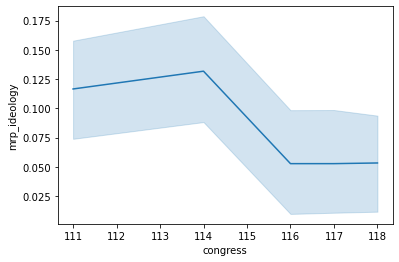

In [16]:
sns.lineplot(x='congress', y="mrp_ideology", data=cdid[cdid.state=="Texas"])

In [14]:
cdid.cd_fips[cdid.state=="Texas"].value_counts()

4801.0    5
4818.0    5
4832.0    5
4831.0    5
4830.0    5
4829.0    5
4828.0    5
4827.0    5
4826.0    5
4825.0    5
4824.0    5
4823.0    5
4822.0    5
4821.0    5
4802.0    5
4819.0    5
4820.0    5
4817.0    5
4809.0    5
4803.0    5
4804.0    5
4805.0    5
4806.0    5
4816.0    5
4808.0    5
4807.0    5
4810.0    5
4811.0    5
4812.0    5
4813.0    5
4814.0    5
4815.0    5
4833.0    4
4834.0    4
4835.0    4
4836.0    4
4837.0    1
4838.0    1
Name: cd_fips, dtype: int64

In [15]:
np.mod(cdid.cd_fips, 100).value_counts()

2.0     216
1.0     215
3.0     189
4.0     173
5.0     146
6.0     131
7.0     120
8.0     106
9.0      85
10.0     65
11.0     60
12.0     55
13.0     51
14.0     44
15.0     36
0.0      35
16.0     34
17.0     31
18.0     29
19.0     22
20.0     20
21.0     20
22.0     20
23.0     20
24.0     20
25.0     20
26.0     19
27.0     18
28.0     12
29.0     11
30.0     10
31.0     10
32.0     10
36.0      9
33.0      9
34.0      9
35.0      9
37.0      6
38.0      6
48.0      5
49.0      5
50.0      5
98.0      5
51.0      5
52.0      5
46.0      5
47.0      5
40.0      5
45.0      5
44.0      5
43.0      5
42.0      5
41.0      5
39.0      5
53.0      4
55.0      1
Name: cd_fips, dtype: int64

In [18]:
cdid['district']= np.mod(cdid.cd_fips, 100)
cdid[['district', 'cd_fips']]

,district,cd_fips
0,0.0,1000.0
1,0.0,1000.0
2,0.0,1000.0
3,0.0,1000.0
4,0.0,1000.0
...,...,...
2178,5.0,905.0
2179,5.0,905.0
2180,5.0,905.0
2181,NaN,NaN


## Newsletters

In [20]:
immig = pd.read_csv("dcinbox_export_immigration.csv")
immig

,Subject,Body,Unix Timestamp,BioGuide ID,Congress,First Name,Last Name,Date of Birth,Gender,State,District,Party,Chamber,Nickname,ID
0,Western Kansas Delegation Goes to Washington,"If you are having trouble viewing this email,...",1682365431000,M000934,118,Jerry,Moran,1954-05-29,M,KS,NaN,Republican,Senate,NaN,220087
1,The Bost Bulletin,News from Rep. Bost The Bost Bulletin Dear Fr...,1682345514000,B001295,118,Mike,Bost,1960-12-30,M,IL,12.0,Republican,House,NaN,220065
2,Men in Girls' Sports? A New Green New Deal? Cr...,"Dear Friends, Happy Monday! Last week was act...",1682345492000,M001218,118,Rich,McCormick,1968-10-07,M,GA,6.0,Republican,House,NaN,220066
3,An Update from Congressman Austin Scott,"April 24, 2023 Dear Georgian, With summer tra...",1682334719000,S001189,118,Austin,Scott,1969-12-10,M,GA,8.0,Republican,House,NaN,220054
4,Weekly Wrap-Up with Congressman Byron Donalds,Weekly Wrap-Up with Congressman Byron Donalds...,1682332302000,D000032,118,Byron,Donalds,1978-10-28,M,FL,19.0,Republican,House,NaN,220049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18875,1-5-2010 BARRETT TO UPDATE AND REINTRODUCE THE...,If you are having trouble viewing this messag...,1262689451000,B001239,111,James,Barrett,1961-02-14,M,SC,3.0,Republican,House,J. Gresham,71998
18876,Rep. Duncan Hunter Washington Report,Website | About Me | Constituent Services | N...,1262685413000,H001048,111,Duncan,Hunter,1976-12-07,M,CA,52.0,Republican,House,NaN,72006
18877,Subscribe for New E-Newsletter on Federal Gran...,If you are having trouble viewing this messag...,1262675480000,A000362,111,Jason,Altmire,1968-03-07,M,PA,4.0,Democrat,House,NaN,72005
18878,"Randy`s Roundup - January 4, 2010",If you are having trouble viewing this messag...,1262617322000,N000182,111,Randy,Neugebauer,1949-12-24,M,TX,19.0,Republican,House,NaN,72009


In [35]:
import datetime as datetime

In [36]:
immig.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18880 entries, 0 to 18879
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Subject         18879 non-null  object 
 1   Body            18880 non-null  object 
 2   Unix Timestamp  18880 non-null  int64  
 3   BioGuide ID     18880 non-null  object 
 4   Congress        18880 non-null  int64  
 5   First Name      18880 non-null  object 
 6   Last Name       18880 non-null  object 
 7   Date of Birth   18879 non-null  object 
 8   Gender          18880 non-null  object 
 9   State           18880 non-null  object 
 10  District        16521 non-null  float64
 11  Party           18880 non-null  object 
 12  Chamber         18880 non-null  object 
 13  Nickname        1380 non-null   object 
 14  ID              18880 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 2.2+ MB


In [47]:
datetime.datetime.fromtimestamp(1262609656000/1000).year

2010

In [70]:
datetime.datetime.fromtimestamp(immig['Unix Timestamp']/1000)

TypeError: cannot convert the series to <class 'int'>

In [73]:
immig['year'] = (immig['Unix Timestamp']/1000).apply(lambda x: datetime.datetime.fromtimestamp(x).year)

In [74]:
immig['year'].value_counts()

2021    2169
2019    1983
2022    1948
2018    1875
2017    1623
2014    1603
2013    1520
2015    1413
2020    1087
2016    1060
2010     797
2012     663
2011     617
2023     522
Name: year, dtype: int64

In [80]:
immigcd = immig.groupby(['Congress','State','District']).size().reset_index()
immigcd

,Congress,State,District,0
0,111,AL,1.0,4
1,111,AL,2.0,3
2,111,AL,3.0,1
3,111,AL,5.0,8
4,111,AL,6.0,12
...,...,...,...,...
2246,118,WA,6.0,1
2247,118,WA,7.0,1
2248,118,WI,6.0,7
2249,118,WI,7.0,8


In [86]:
immigcd.columns

Index(['Congress', 'State', 'District', 0], dtype='object')

In [89]:
immigcd = immigcd.rename(columns={0:'immig'})

<AxesSubplot:xlabel='Congress', ylabel='immig'>

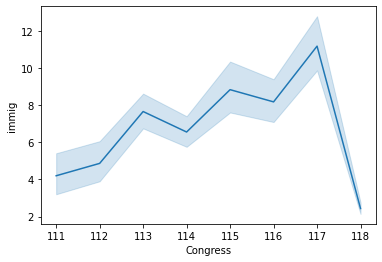

In [90]:
sns.lineplot(x='Congress', y='immig', data=immigcd)